In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
netflix_cleaned = pd.read_csv('../data/clean/netflix_cleaned.csv')

In [3]:
netflix_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [4]:
netflix_cleaned.shape

(8797, 12)

In [5]:
netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   int64 
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(2), object(10)
memory usage: 824.8+ KB


In [151]:
netflix = netflix_cleaned.copy()

In [7]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [8]:
#Altough I already changed the type of date_added into datetime before, after uploading the new csv, it is wrong again.
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-23
          ...    
8792   2018-05-01
8793   2017-01-17
8794   2018-09-13
8795   2016-12-15
8796   2019-07-01
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [9]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
listed_in               object
description             object
dtype: object

#### Movies VS TV shows in Netflix

- Netflix provides more movies than TV shows.

<AxesSubplot: xlabel='type', ylabel='count'>

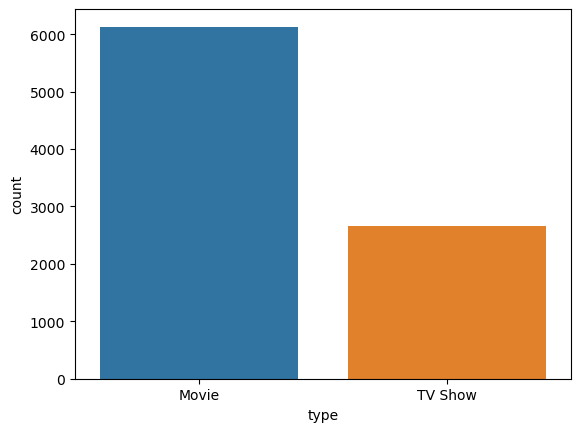

In [10]:
sns.countplot(x=netflix['type'])

## Q1: Most contributed country in Netflix

#### Split 'country'

- Since there are more than one country names in many country columns, I need to split them into different rows which row only contains one country name. The new dataset will have duplicates, but it doesn't matter since I will not change the original dataset. I made this step only for analyzing 'country' in Netflix.

In [11]:
netflix['country'].value_counts()

United States                                    3642
India                                             972
United Kingdom                                    418
Japan                                             244
South Korea                                       199
                                                 ... 
United States,                                      1
Belgium, United Kingdom, United States              1
India, Germany, Austria                             1
China, Japan                                        1
United States, France, South Korea, Indonesia       1
Name: country, Length: 748, dtype: int64

In [12]:
netflix['country'].nunique()

748

In [13]:
#make a copy to aviod chaning the netflix dataset
net_country =netflix.copy() 

In [14]:
#to change this 'country' column to array for further explode
net_country['country'] = net_country['country'].str.split(', ')

In [15]:
net_country = net_country.explode('country')

In [16]:
net_country.reset_index(drop=True,inplace=True)

In [17]:
net_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10830,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...",France,2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
10831,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...",South Korea,2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
10832,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...",Indonesia,2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
10833,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [209]:
#save it for further tableau analysis
net_country.to_csv('../data/clean/netflix_country_cleaned.csv', index=False)

In [30]:
net_country['country'].value_counts()

United States     4513
India             1046
United Kingdom     803
Canada             445
France             393
                  ... 
Mongolia             1
Bahamas              1
Sri Lanka            1
Latvia               1
Azerbaijan           1
Name: country, Length: 127, dtype: int64

- Since there are too many countries, i would only select the top 10.

### Plot the top 10 countries in Netflix(without differentiate movies and tvshows)

In [31]:
num_country=net_country['country'].value_counts().reset_index(drop=False).head(10)

In [32]:
num_country.columns=['country','number']

In [33]:
num_country

,country,number
0,United States,4513
1,India,1046
2,United Kingdom,803
3,Canada,445
4,France,393
5,Japan,317
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


[Text(0.5, 1.0, 'Top 10 countries')]

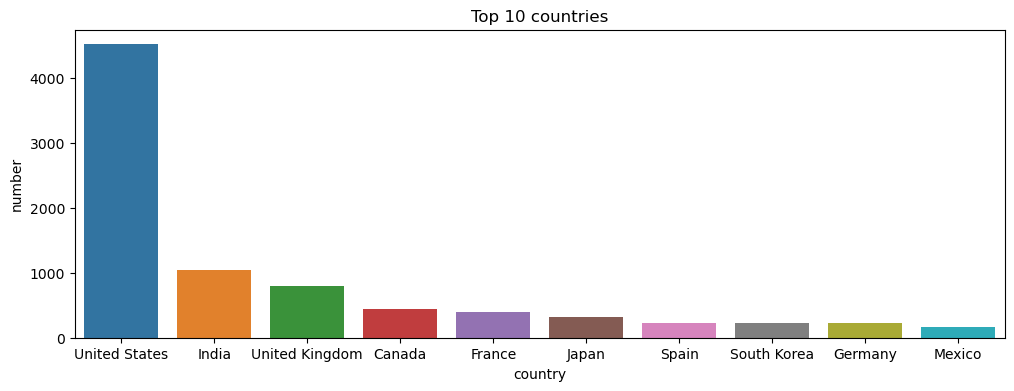

In [40]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=num_country, x='country', y='number').set(title='Top 10 countries')


- It is obvious that most movies and tvshows are directed in United States. 

### Plot top 10 countries for Moive in Neflix

In [42]:
movies = net_country[net_country['type']=='Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [47]:
num_country_movie=movies['country'].value_counts().reset_index(drop=False).head(10)

In [48]:
num_country_movie.columns=['country','number']

In [51]:
num_country_movie

,country,number
0,United States,3191
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


[Text(0.5, 1.0, 'Top 10 countries in Movie')]

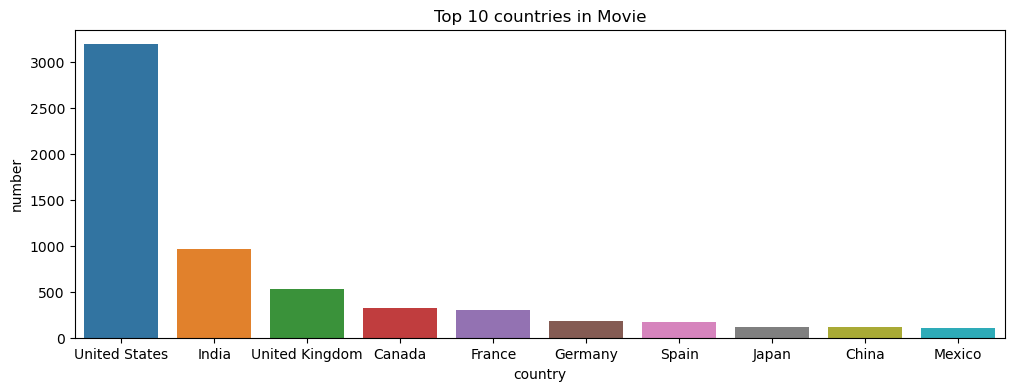

In [54]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data= num_country_movie, x='country', y='number').set(title='Top 10 countries for Movie')

### Plot top 10 countries for TV Show in Netflix

In [44]:
tvshows=net_country[net_country['type']=='TV Show']
tvshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7814,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
7815,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
7816,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
7817,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7818,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [55]:
num_country_tvshows=tvshows['country'].value_counts().reset_index(drop=False).head(10)

In [56]:
num_country_tvshows.columns=['country','number']

In [57]:
num_country_tvshows

,country,number
0,United States,1322
1,United Kingdom,271
2,Japan,198
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,65
9,Spain,61


[Text(0.5, 1.0, 'Top 10 countries in TV Show')]

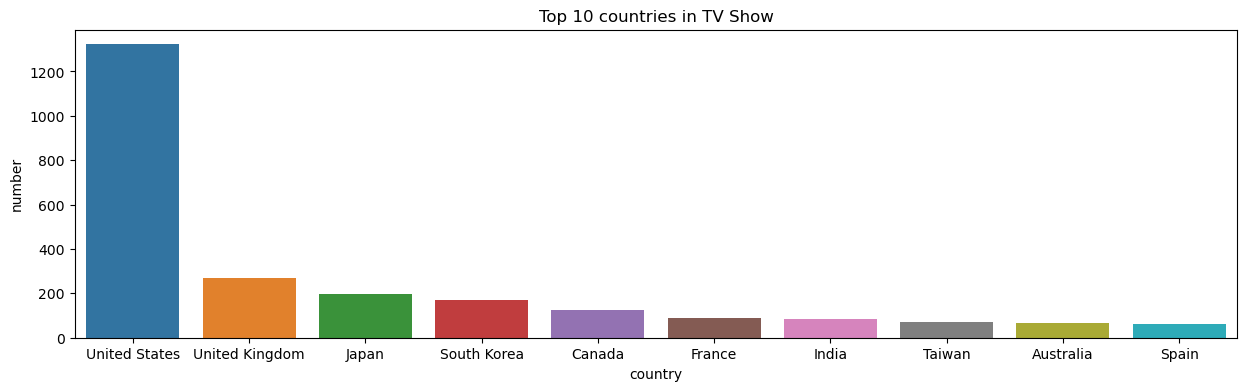

In [61]:
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(data= num_country_tvshows, x='country', y='number').set(title='Top 10 countries for TV Show')

- In summary, the top country which directed the most movies and tvshows is US. In addition, India focuses more on movies instead of tvshows in Netflix. 

### Comapre the number of movies and tvshows for each coutry (select top 10 countries)

In [212]:
top_10 = num_country['country'].unique()
top_10

array(['United States', 'India', 'United Kingdom', 'Canada', 'France',
       'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico'], dtype=object)

In [218]:
counts_per_country =net_country.loc[net_country['country'].isin(top_10)]
counts_per_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
5,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
6,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


[Text(0.5, 1.0, 'Number of movies and tvshows per country')]

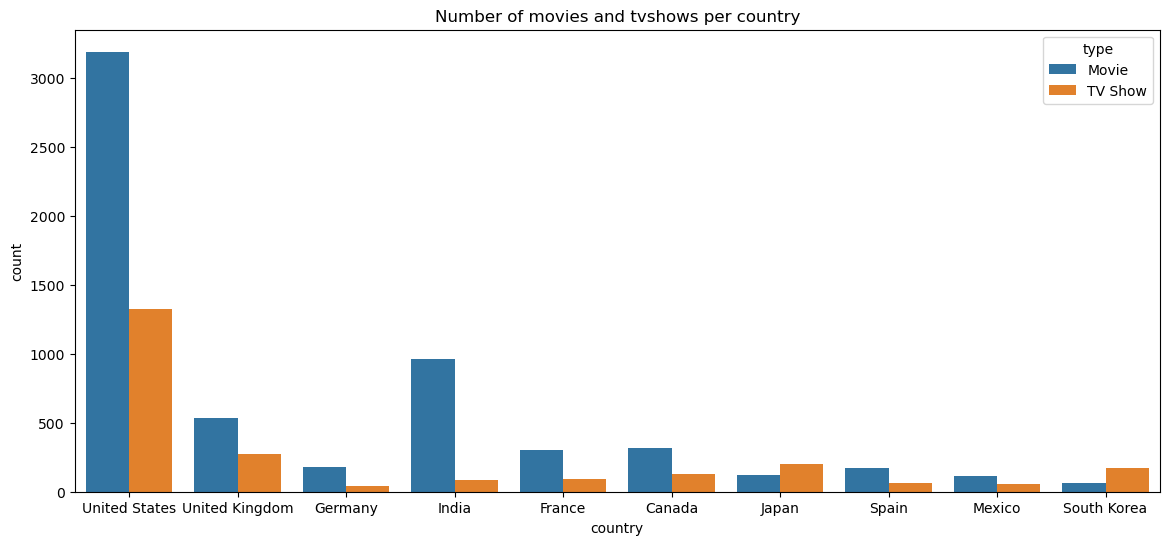

In [219]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(data=counts_per_country,x='country',hue='type').set(title='Number of movies and tvshows per country')

- Among the top 10 countries, all countries has more movies than tvshows except Japan and South Korea.

### Q2：Which year released the most number of movies and tvshows?

In [60]:
netflix['release_year'].value_counts()

2018    1146
2017    1032
2019    1030
2020     953
2016     901
        ... 
1947       1
1961       1
1966       1
1959       1
1925       1
Name: release_year, Length: 74, dtype: int64

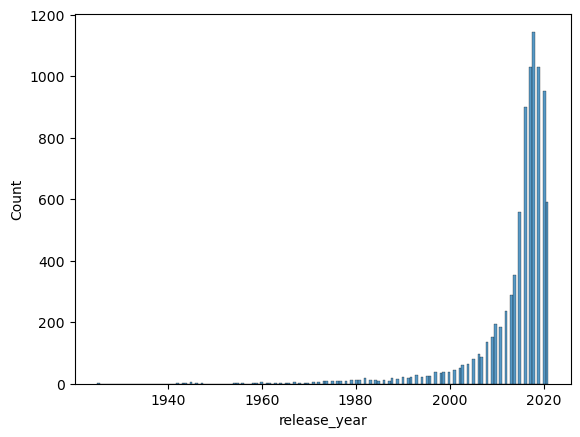

In [170]:
#Distribution of release_year
sns.histplot(netflix['release_year'])
plt.show()

<AxesSubplot: >

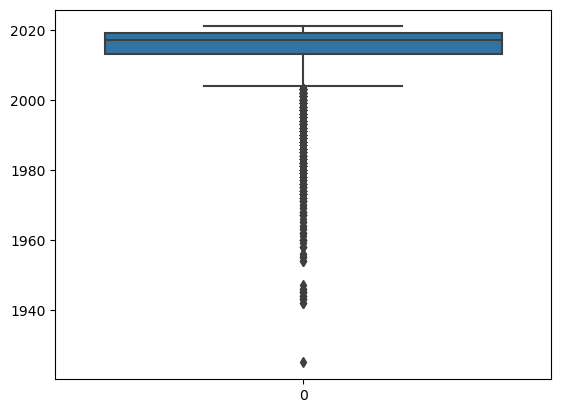

In [169]:
 #using box-plot to find outliers
sns.boxplot(netflix['release_year'])

In [97]:
counts_release= netflix['release_year'].value_counts().reset_index(drop=False)

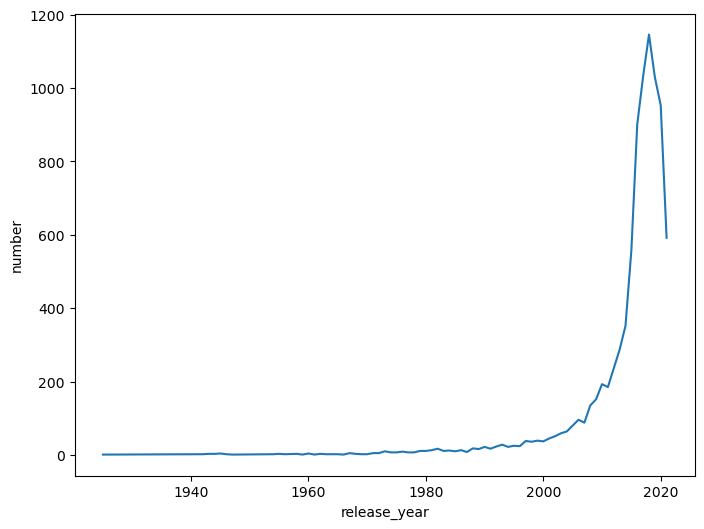

In [168]:
# check the time dependency analysis using a seaborn lineplot
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data =counts_release , x ='release_year', y ='number')
plt.show()

In [98]:
counts_release_20= netflix['release_year'].value_counts().reset_index(drop=False).head(20)

In [99]:
counts_release_20.columns=['release_year','number']

In [100]:
counts_release_20

,release_year,number
0,2018,1146
1,2017,1032
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,558
7,2014,352
8,2013,287
9,2012,236


[Text(0.5, 1.0, 'Number of Movies and TV shows released per year')]

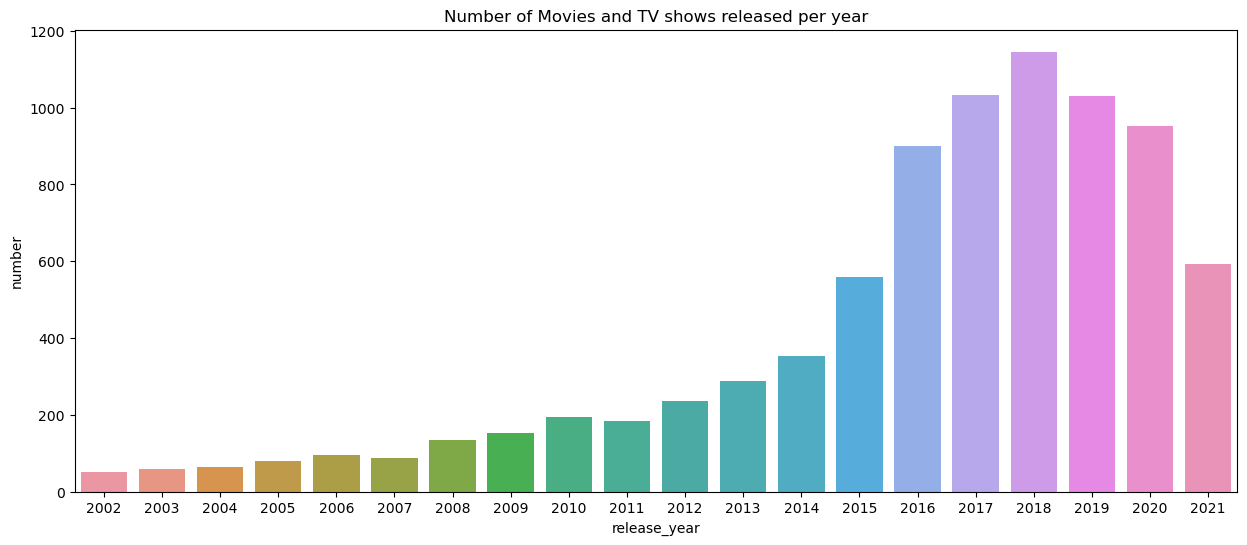

In [101]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data= counts_release_20, x='release_year', y='number').set(title='Number of Movies and TV shows released per year')

- 2018 released the most number of movies and tvshows,followed by 2017 and 2019. In general,there is an upward trend in releasing movies and tvshows. From 2002 to 2011,there is only a slight increase for the number of movies and tvshows released. However, Netflix started to release more and more movies and tvshows afterwards, reaching at its peak in 2018. There is a downward trend in recently 3 years.

### Create a  scatter plot combined with a regression line

In [103]:
counts_release.columns=['release_year','number']

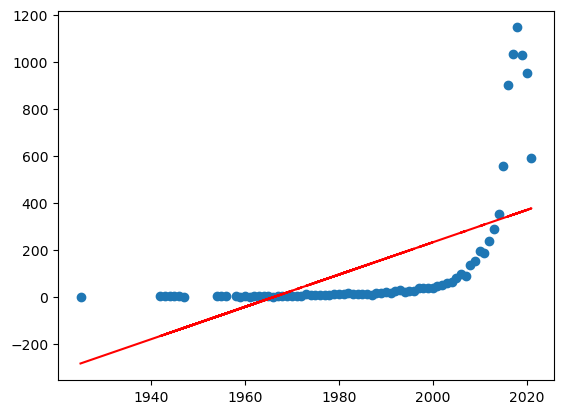

In [128]:
from sklearn.linear_model import LinearRegression
X=counts_release['release_year'].values.reshape(-1, 1)
Y=counts_release['number'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

- As we can see that this scatterplot, we can't say there is a positive relationship between release_year and the number of moveis and tvshows in Netflix since the number of movies and tvshows went down from 2019.However, before 2019, there is a positive relationship between them. 

### Q3：Which age group is the main group corresponding to 'rating' in Netflix?

In [133]:
netflix['rating'].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [134]:
netflix['rating'].value_counts()

TV-MA       3212
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

After checking the rating dictionary, I am gonna divide all rating into 'kids','Old kids',Teens' and 'Adults'.
- 'kids': G,TV-G,TV-Y
- 'Old kids': TV-Y7,TV-Y7-FV,TV-PG
- 'Teens': PG,PG-13,TV-14
- 'Adults': R,NC-17,UR,NR,TV-MA

In [154]:
#define a function to classify rating into different age group and store it into a new column called 'age_group'
def classifier(value):
    if value in ['G','TV-G','TV-Y']:
        return 'Kids'
    elif value in ['TV-PG','TV-Y7-FV','TV-Y7']:
        return 'Old kids'
    elif value in ['PG','PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'
netflix['age_group'] = netflix['rating'].apply(classifier)

In [155]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Teens
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,Adults


In [156]:
netflix.shape

(8797, 13)

In [157]:
netflix['age_group'].value_counts()

Adults      4096
Teens       2934
Old kids    1200
Kids         567
Name: age_group, dtype: int64

#### Plot distribution of age_group corresponding to rating in Netflix

In [158]:
counts_age = netflix['age_group'].value_counts().reset_index(drop=False)
counts_age.columns=['age','number']
counts_age

,age,number
0,Adults,4096
1,Teens,2934
2,Old kids,1200
3,Kids,567


[Text(0.5, 1.0, 'Distribution of Rating/Age')]

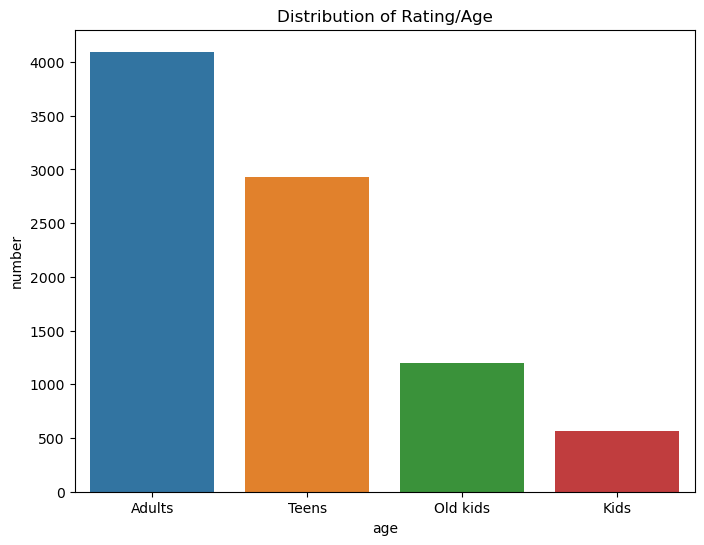

In [160]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=counts_age, x='age',y='number').set(title='Distribution of Rating/Age')

- In netflix, adults are the main audience, followed by teenagers.

### Q4: The most common duration for movies and tvshows respectively

In [171]:
movies_d = netflix[netflix['type']=='Movie']
tvshows_d = netflix[netflix['type']=='TV Show']

In [172]:
movies_d.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Teens
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,Adults


In [173]:
tvshows_d.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
6131,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
6132,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
6133,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
6134,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults
6135,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Adults


[Text(0.5, 1.0, 'Distribution of Movie Duration')]

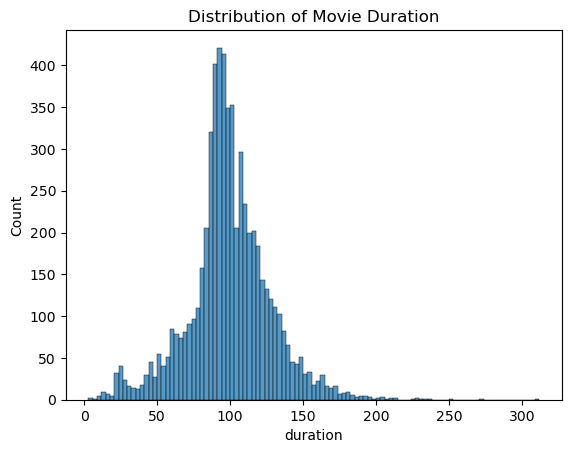

In [195]:
sns.histplot(movies_d['duration']).set(title='Distribution of Movie Duration')

[Text(0.5, 1.0, 'Distribution of TV Show Duration')]

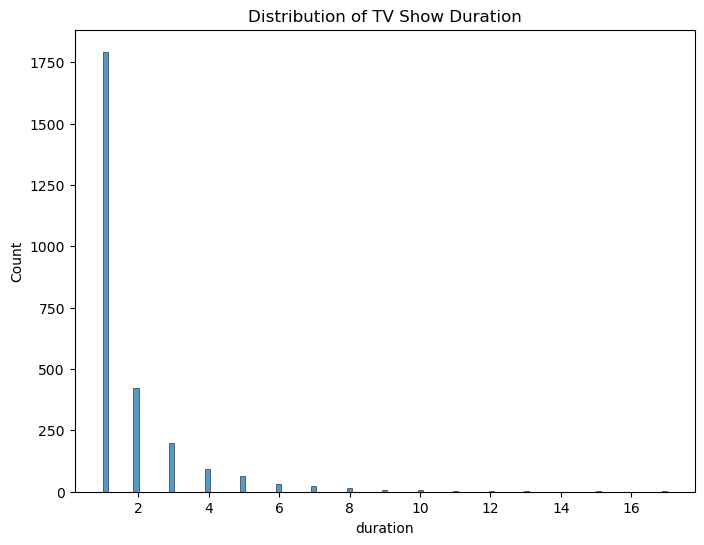

In [194]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=tvshows_d,x='duration').set(title='Distribution of TV Show Duration')

-  Most movies' duration is around 100min.
- Most tvshows'duration is 1 season.

### Q5：Which category of movies is the most popular corresponding to 'list_in' in Netflix?

In [186]:
netflix['listed_in'].value_counts()

Dramas, International Movies                             362
Documentaries                                            359
Stand-Up Comedy                                          334
Comedies, Dramas, International Movies                   274
Dramas, Independent Movies, International Movies         252
                                                        ... 
Classic Movies, Comedies, Sports Movies                    1
Comedies, Dramas, Sports Movies                            1
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy      1
Comedies, Cult Movies, LGBTQ Movies                        1
Classic & Cult TV, Crime TV Shows, TV Dramas               1
Name: listed_in, Length: 513, dtype: int64

In [220]:
net_genre =netflix.copy() 

In [247]:
net_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Teens
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",Adults
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",Adults
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s...",Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre...",Old kids
19299,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",Old kids
19300,s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2,Kids' TV,"While living alone in a spooky town, a young g...",Old kids
19301,s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2,Korean TV Shows,"While living alone in a spooky town, a young g...",Old kids


In [221]:
net_genre['listed_in'] = net_genre['listed_in'].str.split(', ')

In [222]:
net_genre = net_genre.explode('listed_in')

In [223]:
net_genre.reset_index(drop=True,inplace=True)

In [224]:
net_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Teens
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",Adults
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",Adults
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s...",Adults


In [225]:
net_genre.shape

(19303, 13)

In [227]:
net_genre['listed_in'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [228]:
movies_cat = net_genre[net_genre['type']=='Movie']
movies_cat.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Teens
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",Adults
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",Adults
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s...",Adults


In [243]:
movies_cat['listed_in'].value_counts()

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: listed_in, dtype: int64

In [244]:
movies_cat['listed_in'].nunique()

20

In [248]:
tvshows_cat = net_genre[net_genre['type']=='TV Show']
tvshows_cat.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
13190,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults
13191,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Adults
13192,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Adults
13193,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,Adults
13194,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,International TV Shows,To protect his family from a powerful drug lor...,Adults


In [249]:
tvshows_cat['listed_in'].value_counts()

International TV Shows          1350
TV Dramas                        762
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 252
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               83
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 26
TV Shows                          16
Name: listed_in, dtype: int64

In [250]:
tvshows_cat['listed_in'].nunique()

22

In [251]:
counts_cat_m = movies_cat['listed_in'].value_counts().reset_index(drop=False).head(10)
counts_cat_m.columns=['genre','number']
counts_cat_m

,genre,number
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


[Text(0.5, 1.0, 'Top 10 popular movie category')]

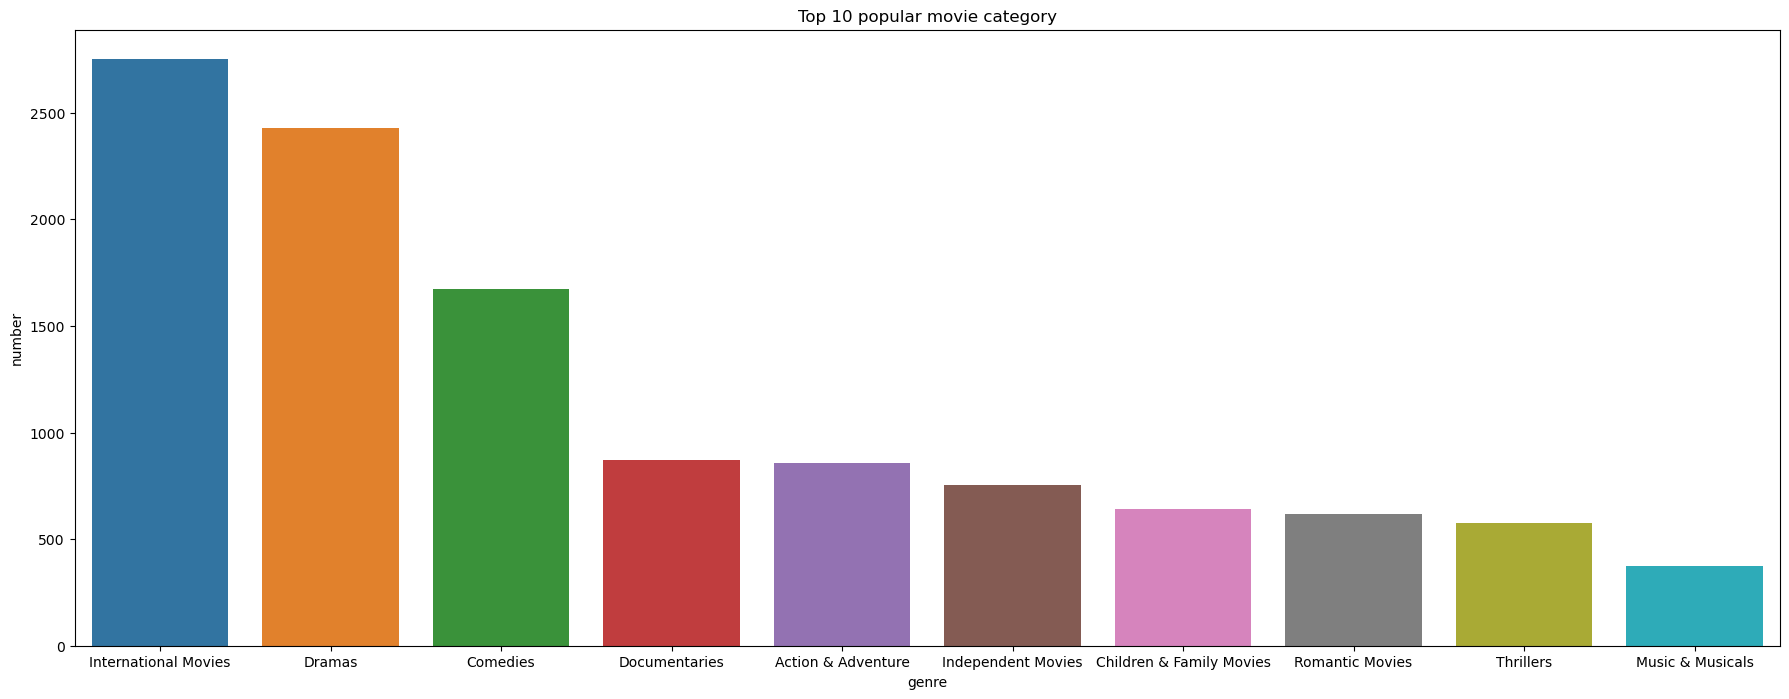

In [252]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(data= counts_cat_m , x='genre', y='number').set(title='Top 10 popular movie category')

In [254]:
counts_cat_tv = tvshows_cat['listed_in'].value_counts().reset_index(drop=False).head(10)
counts_cat_tv.columns=['genre','number']
counts_cat_tv

,genre,number
0,International TV Shows,1350
1,TV Dramas,762
2,TV Comedies,574
3,Crime TV Shows,469
4,Kids' TV,449
5,Docuseries,394
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,175


[Text(0.5, 1.0, 'Top 10 popular tv show category')]

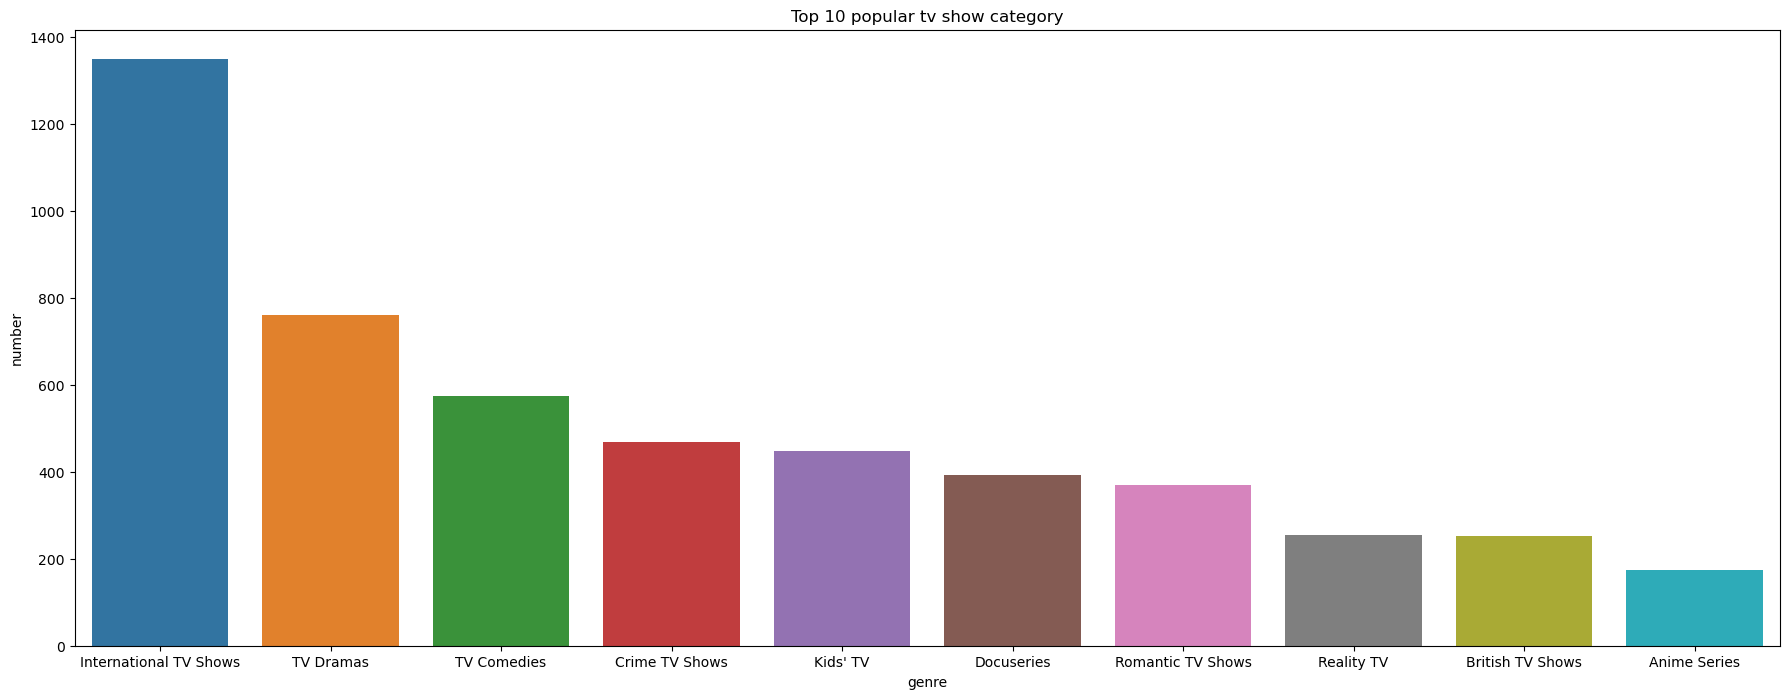

In [255]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(data= counts_cat_tv , x='genre', y='number').set(title='Top 10 popular tv show category')

- As we can see from the two plots, internatinoal, dramas, comedies are the most popular categories for both movies and tv shows in Netflix.